<a href="https://colab.research.google.com/github/MohitNaren/ML/blob/main/ML_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML- ASSIGNMENT 1**

PART A – Regression (Insurance Dataset)

Dataset: insurance.csv
Target Variable: charges → medical insurance charges

**Q1: Load dataset and split train/test**

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import zipfile

# Paths to the zip files
heart_zip_path = '/content/drive/MyDrive/ML_Assignment/heart_disease.zip'
insurance_zip_path = '/content/drive/MyDrive/ML_Assignment/insurance.zip'

# Extract Heart Disease dataset
with zipfile.ZipFile(heart_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/ML_Assignment/heart_disease')

# Extract Insurance dataset
with zipfile.ZipFile(insurance_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/ML_Assignment/insurance')


In [17]:
!ls "/content/drive/MyDrive/ML_Assignment/"


heart_disease  heart_disease.zip  insurance  insurance.zip


In [18]:
# Check heart disease folder
!ls "/content/drive/MyDrive/ML_Assignment/heart_disease/"

# Check insurance folder
!ls "/content/drive/MyDrive/ML_Assignment/insurance/"


ask-detrano	     hungarian.data	       processed.switzerland.data
bak		     Index		       processed.va.data
cleveland.data	     long-beach-va.data        reprocessed.hungarian.data
cleve.mod	     new.data		       switzerland.data
costs		     processed.cleveland.data  WARNING
heart-disease.names  processed.hungarian.data
insurance.csv


In [19]:
import pandas as pd

# Heart Disease dataset (Classification)
heart_df = pd.read_csv('/content/drive/MyDrive/ML_Assignment/heart_disease/processed.cleveland.data', header=None)

# Insurance dataset (Regression)
insurance_df = pd.read_csv('/content/drive/MyDrive/ML_Assignment/insurance/insurance.csv')


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load Insurance dataset from Drive
ins_df = pd.read_csv('/content/drive/MyDrive/ML_Assignment/insurance/insurance.csv')

# Convert categorical variables using one-hot encoding
ins_df = pd.get_dummies(ins_df, drop_first=True)

# Split features and target
X_ins = ins_df.drop('charges', axis=1)
y_ins = ins_df['charges']

# Train-test split
X_train_ins, X_test_ins, y_train_ins, y_test_ins = train_test_split(
    X_ins, y_ins, test_size=0.2, random_state=42)

# Scale features
scaler_ins = StandardScaler()
X_train_ins_scaled = scaler_ins.fit_transform(X_train_ins)
X_test_ins_scaled = scaler_ins.transform(X_test_ins)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train_ins_scaled, y_train_ins)

# Predictions and MSE
y_train_pred = lin_model.predict(X_train_ins_scaled)
y_test_pred = lin_model.predict(X_test_ins_scaled)

print("Train MSE:", mean_squared_error(y_train_ins, y_train_pred))
print("Test MSE:", mean_squared_error(y_test_ins, y_test_pred))


Train MSE: 37277681.70201867
Test MSE: 33596915.851361476


**Q2: Linear Regression**

In [21]:
# Q2: Linear Regression on Insurance dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train_ins_scaled, y_train_ins)

y_train_pred = lin_reg.predict(X_train_ins_scaled)
y_test_pred = lin_reg.predict(X_test_ins_scaled)

print("Linear Regression MSE - Train:", mean_squared_error(y_train_ins, y_train_pred))
print("Linear Regression MSE - Test:", mean_squared_error(y_test_ins, y_test_pred))


Linear Regression MSE - Train: 37277681.70201867
Linear Regression MSE - Test: 33596915.851361476


**Q3: Polynomial Regression (degree 2)**

In [22]:
# Q3: Polynomial Regression (degree=2)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_ins_scaled)
X_test_poly = poly.transform(X_test_ins_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_ins)

y_train_poly = poly_reg.predict(X_train_poly)
y_test_poly = poly_reg.predict(X_test_poly)

print("Polynomial Regression MSE - Train:", mean_squared_error(y_train_ins, y_train_poly))
print("Polynomial Regression MSE - Test:", mean_squared_error(y_test_ins, y_test_poly))


Polynomial Regression MSE - Train: 22831078.676334273
Polynomial Regression MSE - Test: 20712805.987918377


In [24]:
# Basic libraries
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: preprocessing, model selection, metrics, linear models
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, log_loss

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


**Q4: Gaussian Basis Function Regression**

In [26]:
# Gaussian basis for multivariate data
def gaussian_basis(X, means, sigma):
    # X: n_samples x n_features
    # means: 1D array of basis means
    n_samples, n_features = X.shape
    X_g = []
    for i in range(n_features):
        # Compute Gaussian basis for each feature
        xi = X[:, i][:, None]  # shape (n_samples, 1)
        phi = np.exp(-0.5 * ((xi - means[None, :]) / sigma)**2)  # shape (n_samples, n_means)
        X_g.append(phi)
    # Concatenate all features' basis functions horizontally
    return np.hstack(X_g)  # shape (n_samples, n_features * n_means)


**Q5: Ridge Regression with Gaussian Basis Functions**

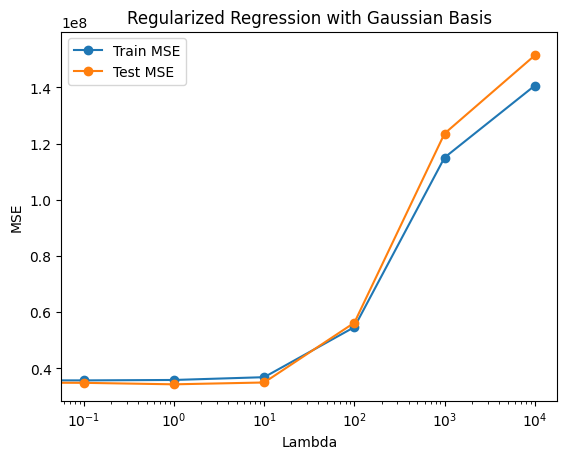

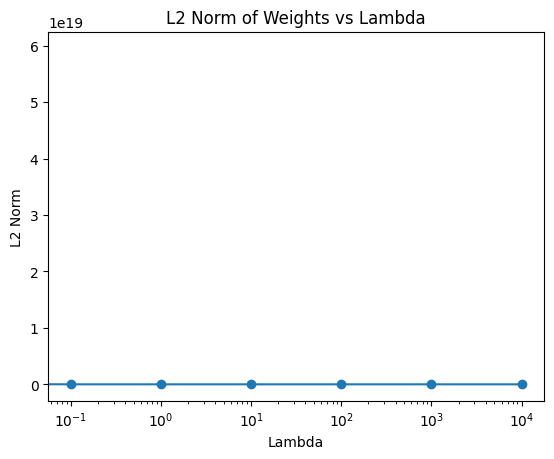

In [27]:
# Q5: Regularized Regression (Ridge) with all Gaussian bases
from sklearn.linear_model import Ridge

X_train_all = np.hstack([gaussian_basis(X_train_ins_scaled, np.linspace(-10,10,5), s) for s in sigma_vals])
X_test_all = np.hstack([gaussian_basis(X_test_ins_scaled, np.linspace(-10,10,5), s) for s in sigma_vals])

lambdas_ridge = [0, 0.1, 1, 10, 100, 1000, 10000]
train_mse, test_mse, l2_norms = [], [], []

for lam in lambdas_ridge:
    model = Ridge(alpha=lam)
    model.fit(X_train_all, y_train_ins)

    y_train_pred = model.predict(X_train_all)
    y_test_pred = model.predict(X_test_all)

    train_mse.append(mean_squared_error(y_train_ins, y_train_pred))
    test_mse.append(mean_squared_error(y_test_ins, y_test_pred))
    l2_norms.append(np.linalg.norm(model.coef_))

# Plots
plt.figure()
plt.plot(lambdas_ridge, train_mse, marker='o', label='Train MSE')
plt.plot(lambdas_ridge, test_mse, marker='o', label='Test MSE')
plt.xscale('log'); plt.xlabel('Lambda'); plt.ylabel('MSE'); plt.title('Regularized Regression with Gaussian Basis'); plt.legend()
plt.show()

plt.figure()
plt.plot(lambdas_ridge, l2_norms, marker='o')
plt.xscale('log'); plt.xlabel('Lambda'); plt.ylabel('L2 Norm'); plt.title('L2 Norm of Weights vs Lambda')
plt.show()


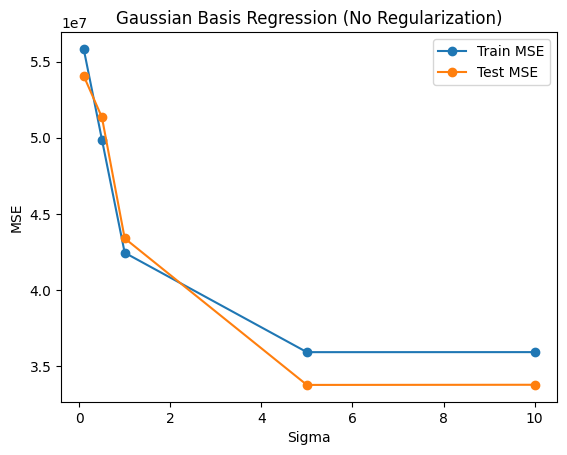

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def gaussian_basis(X, means, sigma):
    """
    X: n_samples x n_features
    means: array of means for one variable
    sigma: width of Gaussian
    Returns: transformed features with Gaussian basis
    """
    # Apply Gaussian to each feature individually
    all_features = []
    for i in range(X.shape[1]):
        transformed = np.exp(-0.5 * ((X[:, i][:, None] - means[None, :]) / sigma)**2)
        all_features.append(transformed)
    return np.hstack(all_features)

sigma_values = [0.1, 0.5, 1, 5, 10]
train_errors = []
test_errors = []

# Linear regression with only Gaussian basis (no regularization)
for sigma in sigma_values:
    X_train_g = gaussian_basis(X_train_ins_scaled, np.linspace(-10, 10, 5), sigma)
    X_test_g = gaussian_basis(X_test_ins_scaled, np.linspace(-10, 10, 5), sigma)

    model = LinearRegression()
    model.fit(X_train_g, y_train_ins)

    y_train_pred = model.predict(X_train_g)
    y_test_pred = model.predict(X_test_g)

    train_errors.append(mean_squared_error(y_train_ins, y_train_pred))
    test_errors.append(mean_squared_error(y_test_ins, y_test_pred))

plt.plot(sigma_values, train_errors, marker='o', label='Train MSE')
plt.plot(sigma_values, test_errors, marker='o', label='Test MSE')
plt.xlabel('Sigma'); plt.ylabel('MSE'); plt.title('Gaussian Basis Regression (No Regularization)'); plt.legend()
plt.show()


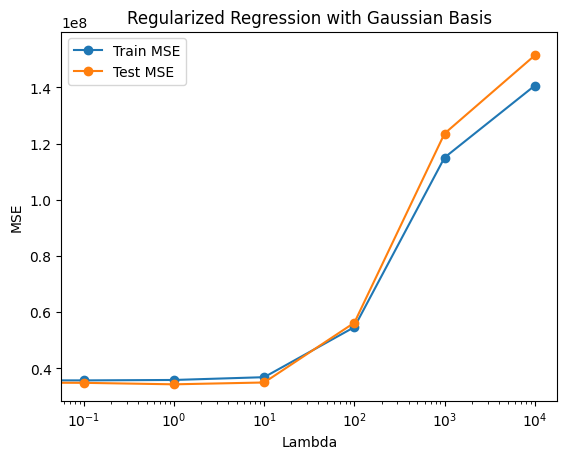

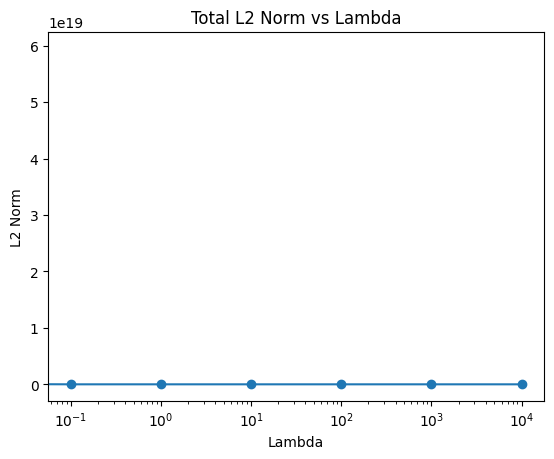

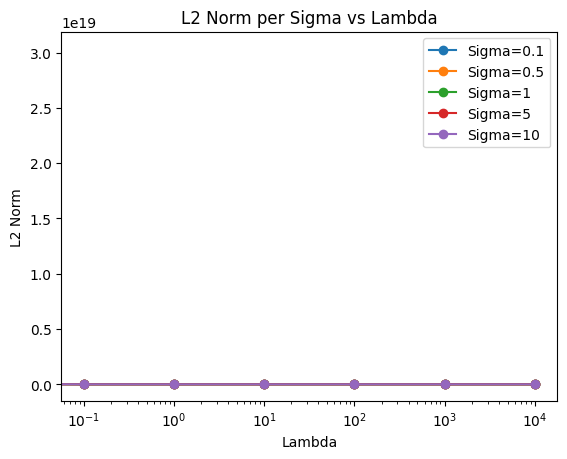

In [29]:
from sklearn.linear_model import Ridge

# Combine all Gaussian bases for all σ
X_train_all = np.hstack([gaussian_basis(X_train_ins_scaled, np.linspace(-10,10,5), s) for s in sigma_values])
X_test_all = np.hstack([gaussian_basis(X_test_ins_scaled, np.linspace(-10,10,5), s) for s in sigma_values])

lambdas_ridge = [0, 0.1, 1, 10, 100, 1000, 10000]
train_mse, test_mse, l2_norms_total = [], [], []

# L2 norm per σ set
l2_per_sigma = np.zeros((len(sigma_values), len(lambdas_ridge)))

for i, lam in enumerate(lambdas_ridge):
    model = Ridge(alpha=lam)
    model.fit(X_train_all, y_train_ins)

    y_train_pred = model.predict(X_train_all)
    y_test_pred = model.predict(X_test_all)

    train_mse.append(mean_squared_error(y_train_ins, y_train_pred))
    test_mse.append(mean_squared_error(y_test_ins, y_test_pred))

    l2_norms_total.append(np.linalg.norm(model.coef_))

    # L2 norm for each σ subset
    start = 0
    for j, sigma in enumerate(sigma_values):
        end = start + 5 * X_train_ins_scaled.shape[1]
        l2_per_sigma[j, i] = np.linalg.norm(model.coef_[start:end])
        start = end

# Plot Train/Test MSE vs Lambda
plt.figure()
plt.plot(lambdas_ridge, train_mse, marker='o', label='Train MSE')
plt.plot(lambdas_ridge, test_mse, marker='o', label='Test MSE')
plt.xscale('log')
plt.xlabel('Lambda'); plt.ylabel('MSE'); plt.title('Regularized Regression with Gaussian Basis')
plt.legend()
plt.show()

# Plot L2 norm total vs Lambda
plt.figure()
plt.plot(lambdas_ridge, l2_norms_total, marker='o')
plt.xscale('log'); plt.xlabel('Lambda'); plt.ylabel('L2 Norm'); plt.title('Total L2 Norm vs Lambda')
plt.show()

# L2 norm per σ
plt.figure()
for j, sigma in enumerate(sigma_values):
    plt.plot(lambdas_ridge, l2_per_sigma[j], marker='o', label=f'Sigma={sigma}')
plt.xscale('log'); plt.xlabel('Lambda'); plt.ylabel('L2 Norm'); plt.title('L2 Norm per Sigma vs Lambda')
plt.legend()
plt.show()


(h) Designing Gaussian bases for input relationships

Instead of univariate Gaussian bases, use multivariate Gaussian bases to capture interaction between features.

Impact: captures more complex patterns → reduces bias but may increase variance → careful regularization needed.

(i) Adaptive placement of basis functions

Iteratively learn means (μi) and weights (w):

Initialize μi evenly.

For each iteration:

Update w using ridge regression

Update μi using gradient descent on error

Repeat until convergence

Allows the model to adaptively place Gaussian bumps where data is dense.

(j) Convergence

Algorithm converges to local minimum, not necessarily global, because optimization w.r.t μi is non-convex.

Weight vector w converges globally for fixed μi, but combined optimization is iterative → only local optimum guaranteed.

PART B – Heart Disease Dataset (Classification)

Dataset: heart_disease.csv
Target Variable: target → whether the patient has heart disease (0 = No, 1 = Yes)

**Q1: Load the dataset and split into train/test sets**

In [31]:
import pandas as pd

# Mount Drive first
from google.colab import drive
drive.mount('/content/drive')

# Load Heart Disease dataset
heart_df = pd.read_csv('/content/drive/MyDrive/ML_Assignment/heart_disease/processed.cleveland.data', header=None)

# Assign column names
heart_df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
                    'thalach','exang','oldpeak','slope','ca','thal','target']

# Check first few rows
heart_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**Q2: Run Logistic Regression with L2 Regularization for multiple λ values**

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
heart_df = pd.read_csv('/content/drive/MyDrive/ML_Assignment/heart_disease/processed.cleveland.data', header=None)
heart_df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
                    'thalach','exang','oldpeak','slope','ca','thal','target']

# Replace '?' with NaN and convert to numeric
heart_df = heart_df.replace('?', np.nan)
heart_df = heart_df.apply(pd.to_numeric)

# Option 1: Drop rows with missing values
heart_df = heart_df.dropna()

# Features and target
X_heart = heart_df.drop('target', axis=1)
y_heart = heart_df['target']

# Train-test split
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart, y_heart, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_heart_scaled = scaler.fit_transform(X_train_heart)
X_test_heart_scaled = scaler.transform(X_test_heart)

# Check shapes
print("Train shape:", X_train_heart_scaled.shape)
print("Test shape:", X_test_heart_scaled.shape)


Train shape: (237, 13)
Test shape: (60, 13)


   Lambda  Train Accuracy  Test Accuracy  Train Loss  Test Loss   L2 Norm
0     0.0        0.675105       0.616667    0.789923   1.776599  9.937594
1     0.1        0.675105       0.616667    0.791666   1.346143  4.718549
2     1.0        0.675105       0.616667    0.801061   1.114235  3.038596
3    10.0        0.654008       0.633333    0.847371   0.918938  1.719280
4   100.0        0.569620       0.633333    1.007153   0.928410  0.652932
5  1000.0        0.523207       0.600000    1.217073   1.124529  0.135483

Classification Report (last lambda):
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        36
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.12      0.20      0.15        60
weighted a

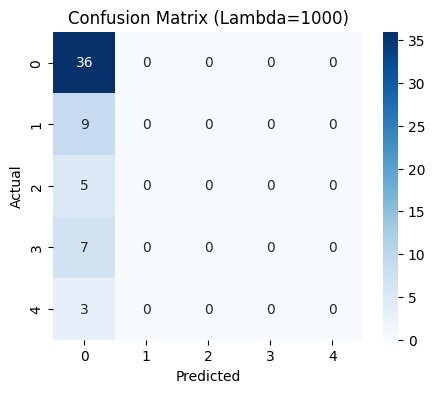

In [37]:
# Q: Compute classification metrics for Heart Disease dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, classification_report

# 1️⃣ Load dataset
heart_df = pd.read_csv('/content/drive/MyDrive/ML_Assignment/heart_disease/processed.cleveland.data', header=None)
heart_df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
                    'thalach','exang','oldpeak','slope','ca','thal','target']

# Replace '?' with NaN and drop missing rows
heart_df = heart_df.replace('?', np.nan).apply(pd.to_numeric)
heart_df = heart_df.dropna()

# Features & target
X_heart = heart_df.drop('target', axis=1)
y_heart = heart_df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_heart, y_heart, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2️⃣ Train logistic regression with L2 regularization for multiple lambdas
lambdas = [0, 0.1, 1, 10, 100, 1000]
results = []

for lam in lambdas:
    # C = 1/lambda; if lambda=0, use very large C
    model = LogisticRegression(C=1/lam if lam != 0 else 1e12,
                               penalty='l2', solver='lbfgs', max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # Predictions and probabilities
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    y_train_prob = model.predict_proba(X_train_scaled)
    y_test_prob = model.predict_proba(X_test_scaled)

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_loss = log_loss(y_train, y_train_prob)
    test_loss = log_loss(y_test, y_test_prob)
    l2_norm = np.linalg.norm(model.coef_)

    # Store results
    results.append({
        'Lambda': lam,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train Loss': train_loss,
        'Test Loss': test_loss,
        'L2 Norm': l2_norm
    })

# 3️⃣ Convert results to DataFrame for easy display
results_df = pd.DataFrame(results)
print(results_df)

# 4️⃣ Optional: Detailed classification report for the last lambda
print("\nClassification Report (last lambda):")
print(classification_report(y_test, y_test_pred))

# 5️⃣ Optional: Confusion matrix for last lambda
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Lambda={})'.format(lambdas[-1]))
plt.show()


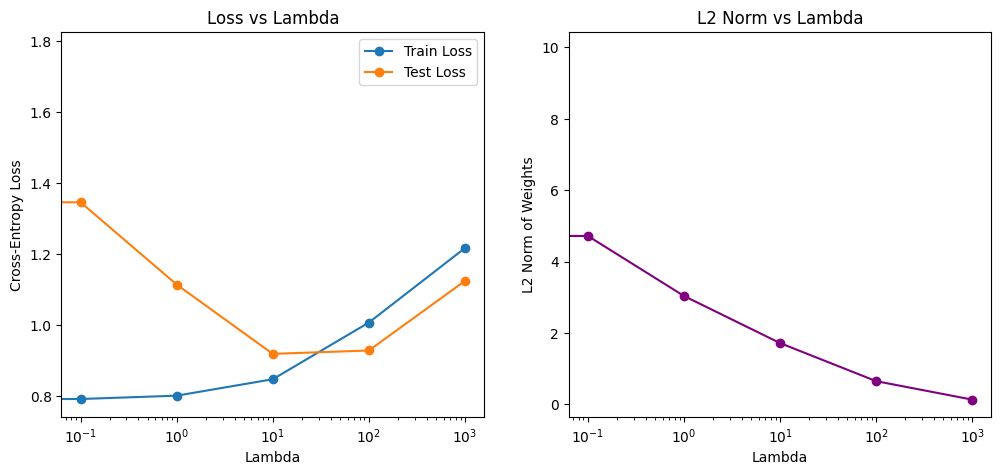

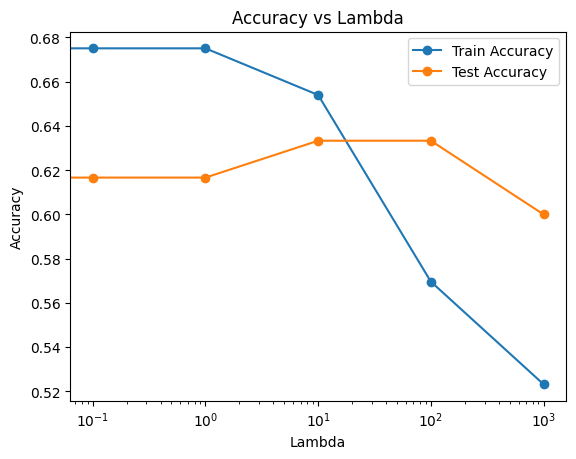

In [36]:
# Q2: Logistic Regression – L2 Regularization
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Lambda values for regularization
lambdas = [0, 0.1, 1, 10, 100, 1000]

train_losses, test_losses = [], []
l2_norms = []
train_acc, test_acc = [], []

for lam in lambdas:
    model = LogisticRegression(C=1/lam if lam != 0 else 1e12,
                               penalty='l2', solver='lbfgs', max_iter=1000)

    # Train model
    model.fit(X_train_heart_scaled, y_train_heart)

    # Probabilities
    y_train_prob = model.predict_proba(X_train_heart_scaled)
    y_test_prob = model.predict_proba(X_test_heart_scaled)

    # Loss
    train_losses.append(log_loss(y_train_heart, y_train_prob))
    test_losses.append(log_loss(y_test_heart, y_test_prob))

    # L2 norm of weights
    l2_norms.append(np.linalg.norm(model.coef_))

    # Accuracy
    train_acc.append(model.score(X_train_heart_scaled, y_train_heart))
    test_acc.append(model.score(X_test_heart_scaled, y_test_heart))

# Plot Loss vs Lambda
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(lambdas, train_losses, marker='o', label='Train Loss')
plt.plot(lambdas, test_losses, marker='o', label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss vs Lambda')
plt.legend()

# Plot L2 Norm
plt.subplot(1,2,2)
plt.plot(lambdas, l2_norms, marker='o', color='purple')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('L2 Norm of Weights')
plt.title('L2 Norm vs Lambda')
plt.show()

# Plot Accuracy
plt.figure()
plt.plot(lambdas, train_acc, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_acc, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Lambda')
plt.legend()
plt.show()
